In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dao = pd.read_json('../data/boardroom_dao.json', lines=True)
proposals = pd.read_json('../data/dao_proposals.json', lines=True)
tr_bal = pd.read_json('../data/dao_treasury_balance.json', lines=True)
tok_bal = pd.read_json('../data/dao_treasury_token_balance.json', lines=True)
tr_tran = pd.read_json('../data/dao_treasury_transactions.json', lines=True)
vote = pd.read_json('../data/vote.json', lines=True)

In [4]:
dao

,cname,name,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type
0,1inch,1inch,['Protocol'],3,214,175,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO
1,aave,Aave,['Protocol'],58,1790,890,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO
2,aavegotchi,Aavegotchi,['Protocol'],246,77452,6512,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO
3,alchemist,Alchemist,['Service'],24,521,301,"[{'adapter': 'default', 'size': 'small', 'url'...","[{'adapter': 'default', 'symbol': 'mist', 'net...",DAO
4,alchemixfinance,Alchemix Finance,['Uncategorized'],40,6666,1715,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'alcx', 'net...",DAO
...,...,...,...,...,...,...,...,...,...
98,wgmi,WGMI,['Uncategorized'],1,1,1,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO
99,yam,Yam,['Product'],114,13272,3861,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'YAMv2', 'ne...",DAO
100,ybaby,Yearn,['Protocol'],24,6839,4382,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfi', 'netw...",DAO
101,yfbeta,yfBeta,['Protocol'],14,708,324,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO


In [5]:
total_pos_pro = dao[dao['uniqueVoters'] > 100]

In [6]:
# import the circlify library
import circlify

# compute circle positions:
circles = circlify.circlify(
    total_pos_pro['uniqueVoters'].tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

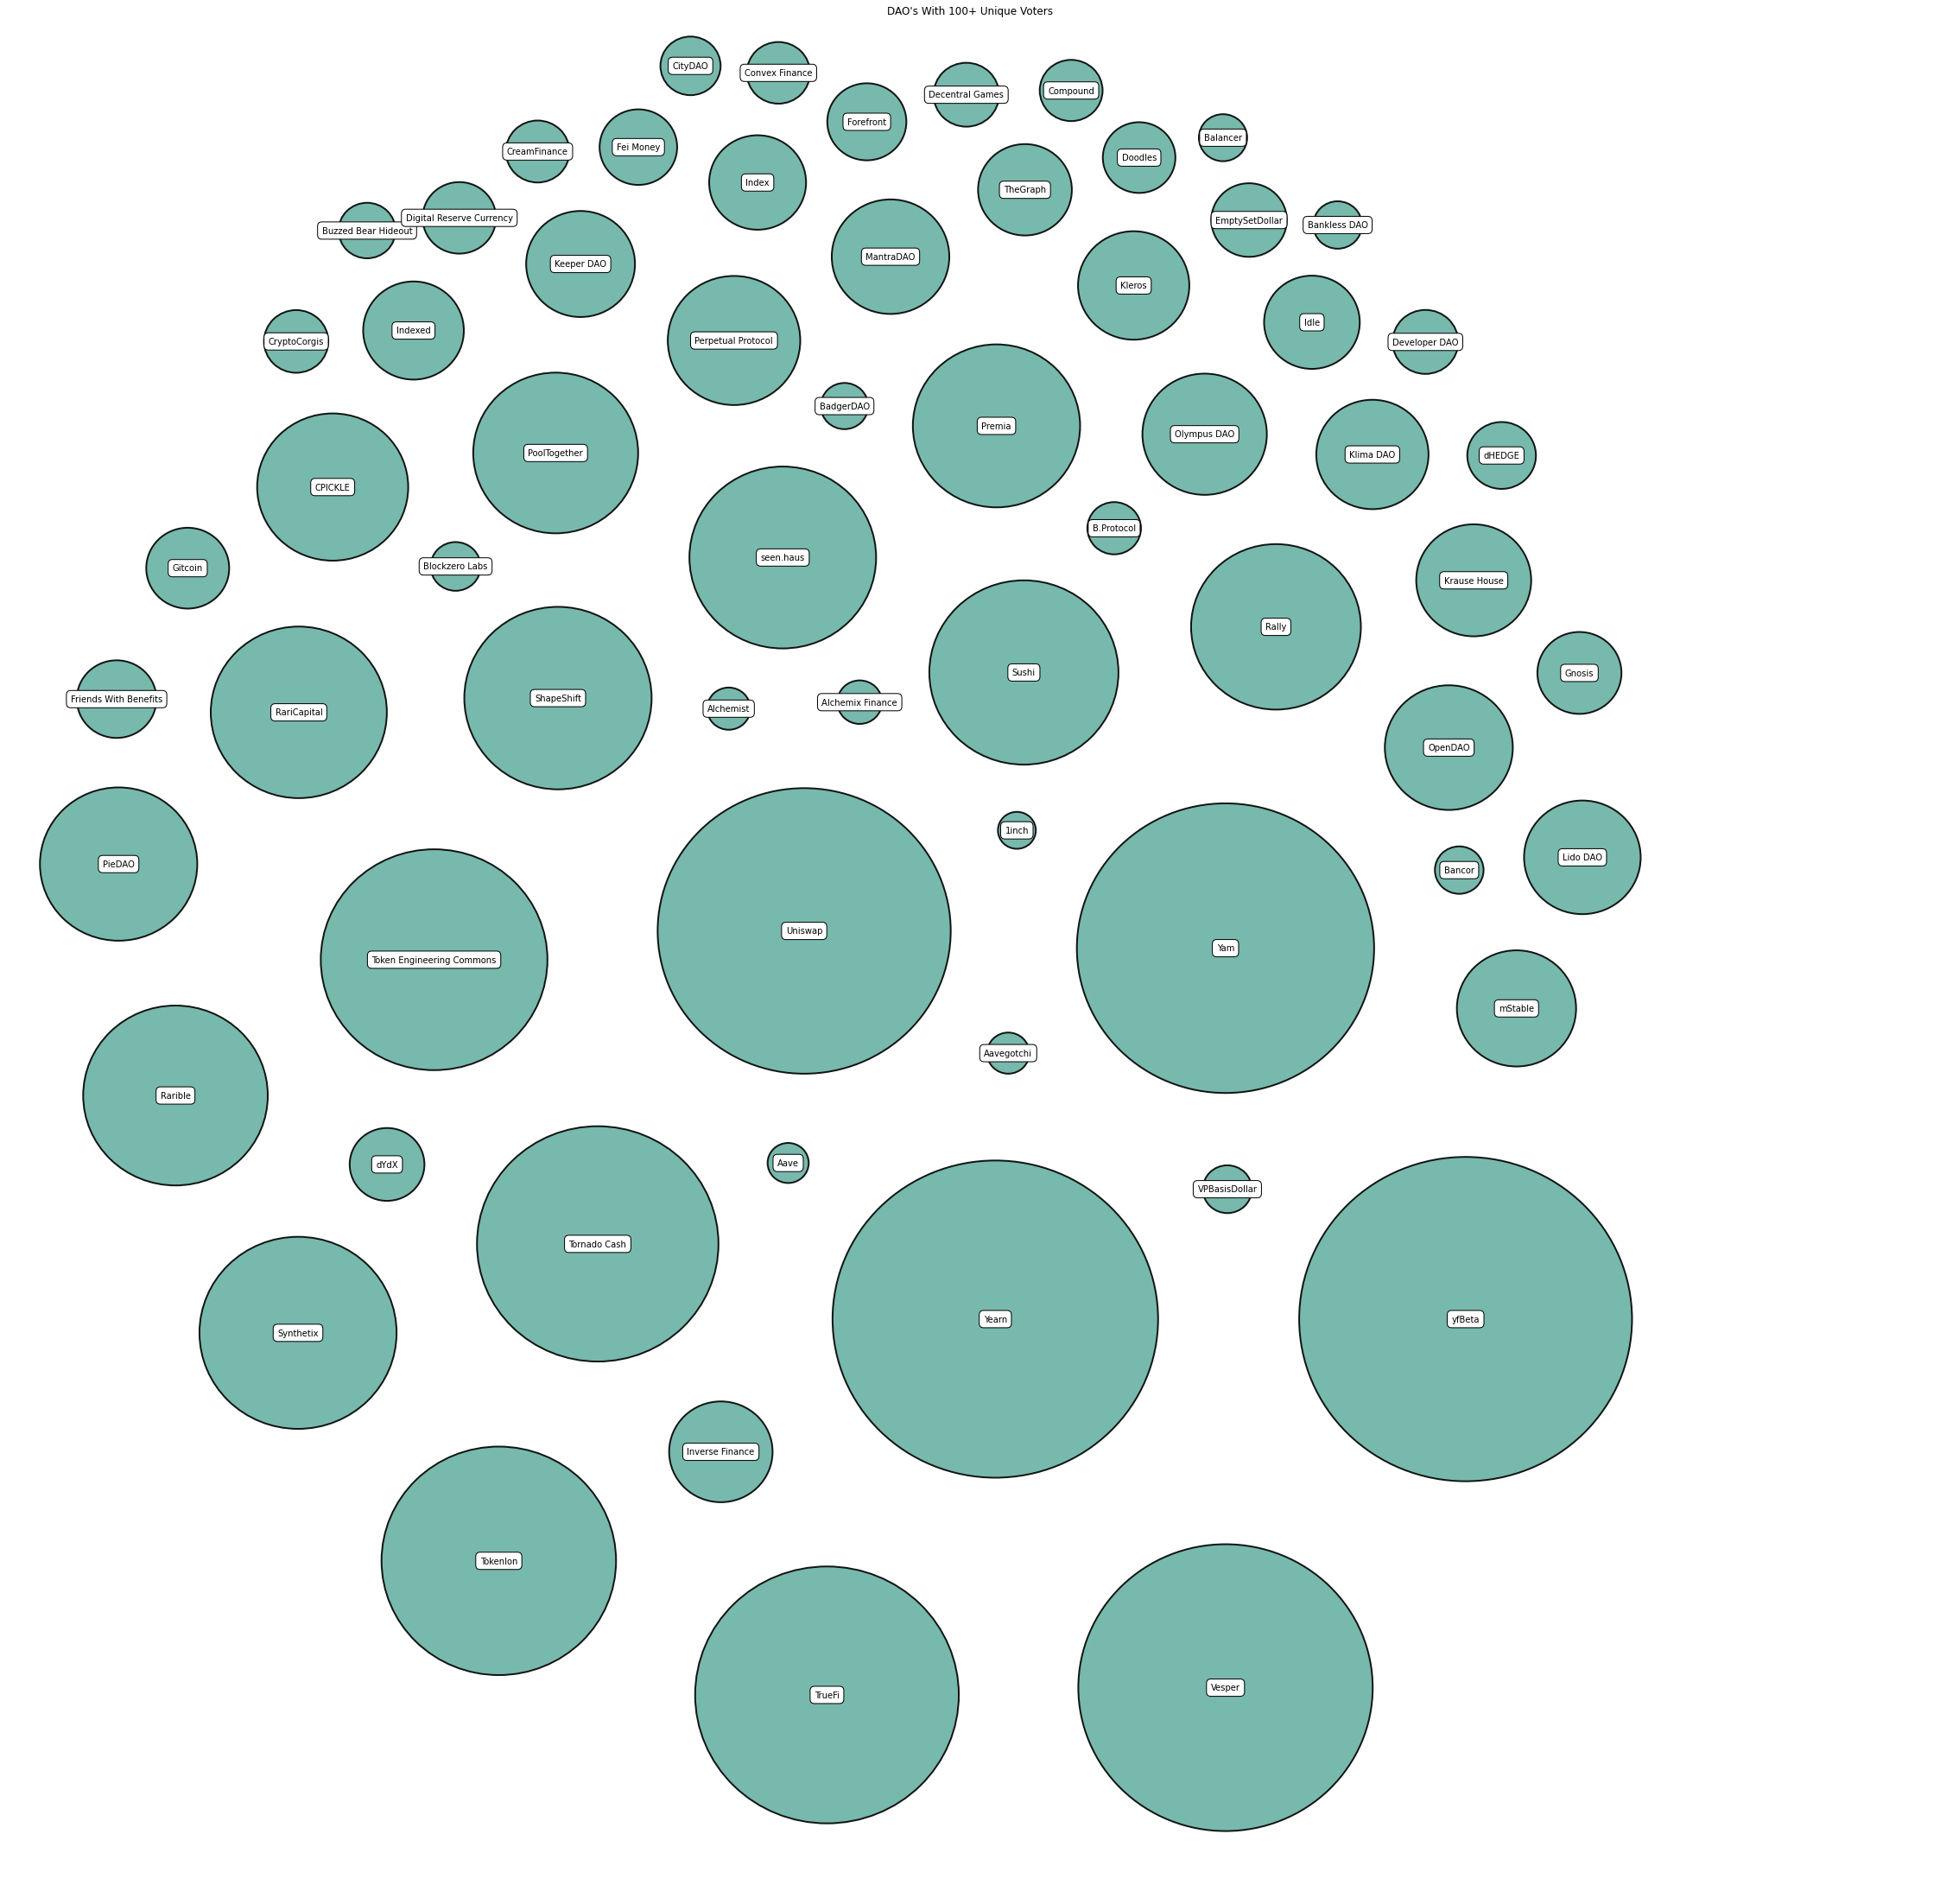

In [7]:
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(40,40))
ax.set_title("DAO's With 100+ Unique Voters")
ax.axis('off')

lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

labels = total_pos_pro['name']

for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r*0.7, alpha=0.9, linewidth=2, facecolor="#69b2a3", edgecolor="black"))
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

In [8]:
dao['categories'].value_counts()

['Protocol']         48
['Uncategorized']    23
['Social']            9
['Product']           8
['Investment']        6
['Service']           4
['Grants']            3
['Media']             1
['Collector']         1
Name: categories, dtype: int64

In [9]:
t = proposals[proposals['currentState']=='executed'].head(20)

In [10]:
t

,refId,id,title,content,protocol,adapter,proposer,totalVotes,blockNumber,externalUrl,startTime,endTime,startTimestamp,endTimestamp,currentState,choices,results,events
3,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjU3,57,Revert ENJ Parameter Changes and Enable FEI as...,## Simple Summary\n\nA proposal to revert ENJ ...,aave,default,0x683a4F9915D6216f73d6Df50151725036bD26C02,9,14077932,None,{'blockNumber': 14077932},{'blockNumber': 14097132},1643155591,1643412286,executed,"['NAY', 'YAE']","[{'total': 407890.38, 'choice': 1}]","[{'time': {'blockNumber': 14102754}, 'event': ..."
4,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjU2,56,Add Assets to Aave Polygon Market and Update W...,\n\n## Simple Summary\n\nThis AIP would list B...,aave,default,0xC3c2e1Cf099Bc6e1fA94ce358562BCbD5cc59FE5,94,14066624,None,{'blockNumber': 14066624},{'blockNumber': 14085824},1643004757,1643261575,executed,"['NAY', 'YAE']","[{'total': 369437.38, 'choice': 1}]","[{'time': {'blockNumber': 14096300}, 'event': ..."
5,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjU1,55,Enable FEI as Collateral on Aave V2,## Simple Summary\n\nA proposal to enable FEI ...,aave,default,0x683a4F9915D6216f73d6Df50151725036bD26C02,5,14030921,None,{'blockNumber': 14030921},{'blockNumber': 14050121},1642527423,1642784225,executed,"['NAY', 'YAE']","[{'total': 441747.97, 'choice': 1}]","[{'time': {'blockNumber': 14052638}, 'event': ..."
7,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjUz,53,Risk Parameter Updates 2021-12-16,## Simple Summary\n\nA proposal to adjust nine...,aave,default,0x683a4F9915D6216f73d6Df50151725036bD26C02,10,13845810,None,{'blockNumber': 13845810},{'blockNumber': 13865010},1640052567,1640310831,executed,"['NAY', 'YAE']","[{'total': 394075.5, 'choice': 1}]","[{'time': {'blockNumber': 13877253}, 'event': ..."
8,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjUy,52,Renew Aave Grants DAO,\n\n## Simple Summary\n\nProvide Aave Grants D...,aave,default,0x5B3bFfC0bcF8D4cAEC873fDcF719F60725767c98,17,13802186,None,{'blockNumber': 13802186},{'blockNumber': 13821386},1639470268,1639726868,executed,"['NAY', 'YAE']","[{'total': 553626.6, 'choice': 1}]","[{'time': {'blockNumber': 13940048}, 'event': ..."
9,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjUx,51,Add G-UNI to Aave V2 AMM Market,\n\n## Simple Summary\n\nAdd Gelato’s G-UNI DA...,aave,default,0x88215a2794ddC031439C72922EC8983bDE831c78,15,13753639,None,{'blockNumber': 13753639},{'blockNumber': 13772839},1638812427,1639077739,executed,"['NAY', 'YAE']","[{'total': 624726.2, 'choice': 1}]","[{'time': {'blockNumber': 13779962}, 'event': ..."
10,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjUw,50,Q2 Dynamic Risk Parameters,## Simple Summary \nA proposal to renew Gauntl...,aave,default,0x683a4F9915D6216f73d6Df50151725036bD26C02,18,13716108,None,{'blockNumber': 13716108},{'blockNumber': 13735308},1638293499,1638558649,executed,"['NAY', 'YAE']","[{'total': 468453.16, 'choice': 1}]","[{'time': {'blockNumber': 13747445}, 'event': ..."
11,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjQ5,49,Authorize the Guardian to hold the emergency k...,\n\n\n## Abstract\nThis Aave Improvement Propo...,aave,default,0x5B3bFfC0bcF8D4cAEC873fDcF719F60725767c98,15,13646015,None,{'blockNumber': 13646015},{'blockNumber': 13665215},1637331268,1637594012,executed,"['NAY', 'YAE']","[{'total': 713963.2, 'choice': 1}]","[{'time': {'blockNumber': 13688890}, 'event': ..."
12,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjQ4,48,Add Fireblocks as a whitelister on Aave Arc,\n\n## Simple Summary\n\nFireblocks asks the A...,aave,default,0xB5Fe4248570954BCa6a2fCA5448f412AF5e4A424,18,13638500,None,{'blockNumber': 13638500},{'blockNumber': 13657700},1637227539,1637491513,executed,"['NAY', 'YAE']","[{'total': 703627.7, 'choice': 1}]","[{'time': {'blockNumber': 13663467}, 'event': ..."
13,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjQ3,47,Aave V2 - Liquidity Mining Program (90 days at...,\n\n## Simple Summary\nLiquidity mining incent...,aave,default,0x7f4C5938AF9731e9feadc09C3FA782508198532E,14,13638437,None,{'blockNumber': 13638437},{'blockNumber': 13657637},1637226576,1637490811,executed,"['NAY', 'YAE']","[{'total': 599441.8,

In [11]:
for x in t['events']:
    print(x)

[{'time': {'blockNumber': 14102754}, 'event': 'queued', 'timestamp': 1643487145}, {'time': {'blockNumber': 14109970}, 'event': 'executed', 'timestamp': 1643582776}]
[{'time': {'blockNumber': 14096300}, 'event': 'executed', 'timestamp': 1643401355}, {'time': {'blockNumber': 14087765}, 'event': 'queued', 'timestamp': 1643287689}]
[{'time': {'blockNumber': 14052638}, 'event': 'queued', 'timestamp': 1642817961}, {'time': {'blockNumber': 14059558}, 'event': 'executed', 'timestamp': 1642910003}]
[{'time': {'blockNumber': 13877253}, 'event': 'executed', 'timestamp': 1640474091}, {'time': {'blockNumber': 13869103}, 'event': 'queued', 'timestamp': 1640364890}]
[{'time': {'blockNumber': 13940048}, 'event': 'executed', 'timestamp': 1641313618}, {'time': {'blockNumber': 13901619}, 'event': 'queued', 'timestamp': 1640799332}]
[{'time': {'blockNumber': 13779962}, 'event': 'executed', 'timestamp': 1639173313}, {'time': {'blockNumber': 13773475}, 'event': 'queued', 'timestamp': 1639086072}]
[{'time': 

In [12]:
vote

,refId,proposalRefId,protocol,adapter,proposalId,address,power,choice,time,timestamp
0,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x44Fb085ffF4b0354b4ccEDf2cc2b648caE938d3C,1.447500e+07,0,{'timestamp': 1643648548},2022-01-31 17:02:28
1,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x4Dc06c025Cb97d6Dc4A17183187e28D297B83C7B,7.500000e+06,0,{'timestamp': 1643670044},2022-01-31 23:00:44
2,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x46EEA8D5b37D2Db51f35c1bC8C50CBf80fb0fFE5,5.250000e+06,0,{'timestamp': 1643659354},2022-01-31 20:02:34
3,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x92c8029165c2aCA6928550A5FecD17c90b448Fa9,3.000000e+06,0,{'timestamp': 1644236118},2022-02-07 12:15:18
4,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x598Dbe6738E0AcA4eAbc22feD2Ac737dbd13Fb8F,1.125000e+06,0,{'timestamp': 1643735761},2022-02-01 17:16:01
...,...,...,...,...,...,...,...,...,...,...
19390,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x30E838D51c61811d382962B4e0699715462DcdE1,1.300000e+01,0,{'timestamp': 1614532468},2021-02-28 17:14:28
19391,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x99261740d712AbCaeb0E9323239EDF4F4B61D523,9.205962e+00,0,{'timestamp': 1614532516},2021-02-28 17:15:16
19392,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x599dBF9f989f38d735B7437954402493C899f173,2.000000e+00,0,{'timestamp': 1614432817},2021-02-27 13:33:37
19393,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x62eD54b8Bfb15D1131275473095044cdfAF80355,0.000000e+00,0,{'timestamp': 1614361399},2021-02-26 17:43:19


In [13]:
tr_bal[tr_bal['protocol']=='1inch']

,protocol,balance,currency,timestamp
0,1inch,6500446,usd,2022-02-12 21:38:41.471
1,1inch,6498552,usd,2022-02-12 09:37:20.676
2,1inch,6473480,usd,2022-02-11 21:33:48.933
3,1inch,6482979,usd,2022-02-11 09:33:41.795
4,1inch,6403261,usd,2022-02-10 21:32:17.818
5,1inch,6447163,usd,2022-02-10 09:28:48.253
6,1inch,6420269,usd,2022-02-09 21:28:45.731
7,1inch,6423365,usd,2022-02-09 09:27:26.887
8,1inch,6381731,usd,2022-02-08 21:27:14.313
9,1inch,6373367,usd,2022-02-08 09:27:12.265


In [14]:
tok_bal

,protocol,currency,balanceInCurrency,tokenBalance,tokenContractAddress,tokenDecimals,tokenName,tokenSymbol,tokenLogoUrl,timestamp
0,1inch,usd,3.072320e+01,1.036745e+16,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,18,Ether,ETH,https://www.covalenthq.com/static/images/icons...,2022-02-12 21:38:41.471
1,1inch,usd,6.500416e+06,6.490192e+12,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,6,USD Coin,USDC,https://logos.covalenthq.com/tokens/1/0xa0b869...,2022-02-12 21:38:41.471
2,aave,usd,0.000000e+00,1.000000e+18,0xf7a5a8a95491ec170738434963b649671b563b88,18,Unisocks Classic Edition 0,SOCKSCLASSIC,https://logos.covalenthq.com/tokens/1/0xf7a5a8...,2022-02-12 17:29:53.581
3,aave,usd,0.000000e+00,0.000000e+00,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,18,Ether,ETH,https://www.covalenthq.com/static/images/icons...,2022-02-12 17:29:53.581
4,aave,usd,7.139914e+08,1.825167e+27,0xbfa0d33f3155321934e4e4334567b9b7c017c90d,18,Metaverse,Meta,https://logos.covalenthq.com/tokens/1/0xbfa0d3...,2022-01-12 15:28:03.105
...,...,...,...,...,...,...,...,...,...,...
794,yup,usd,2.893613e+02,1.000000e+17,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,18,Ether,ETH,https://www.covalenthq.com/static/images/icons...,2022-02-12 22:09:20.089
795,yup,usd,4.346622e+03,2.547016e+20,0xc18360217d8f7ab5e7c516566761ea12ce7f9d72,18,Ethereum Name Service,ENS,https://logos.covalenthq.com/tokens/1/0xc18360...,2022-02-12 22:09:20.089
796,yup,usd,6.540896e+03,5.000000e+21,0x7e9d8f07a64e363e97a648904a89fb4cd5fb94cd,18,Forefront,FF,https://logos.covalenthq.com/tokens/1/0x7e9d8f...,2022-02-12 22:09:20.089
797,yup,usd,1.980537e+03,6.000000e+21,0x69bbc3f8787d573f1bbdd0a5f40c7ba0aee9bcc9,18,YUP,YUP,https://logos.covalenthq.com/tokens/1/0x69bbc3...,2022-02-12 22:09:20.089


In [15]:
tr_tran

,protocol,address,chainId,txnHash,value,fromAddress,toAddress,gasSpent,blockHeight,timestamp
0,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xb6c66c8f1fdf944f6302a345c8d3958f2f174140cac4...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,61128,13993203,2022-01-12 21:39:37.521
1,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xad79360f5e38edb1175df34022b24b4d5f64edfe5c49...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,252990,13992869,2022-01-12 20:26:05.094
2,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xb7ffd554de7b2b329f21055a958479b17aa6d7a46b33...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,261108,13992469,2022-01-12 19:06:06.779
3,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xde7e0f4da03ae1462d46e0b6e1a5d0c4ef866bfd29e3...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,228754,13992428,2022-01-12 18:49:00.777
4,1inch,0x7951c7ef839e26f63da87a42c9a87986507f1c07,1,0xda0ff6d5e480d4d629662180a9d0d4c4ae86281e8f0d...,0.000000e+00,0xa3bf91a131fccfecc43999c9ff4612a25a572859,0xdd9f24efc84d93deef3c8745c837ab63e80abd27,272837,13992431,2022-01-12 18:49:00.777
...,...,...,...,...,...,...,...,...,...,...
1319,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x80ebb6a1ab581ec58fc363edde36a4fd1b6522799717...,0.000000e+00,0x30e838d51c61811d382962b4e0699715462dcde1,0x622236bb180256b6ae1a935dae08dc0356141632,51649,13059204,2021-11-19 21:16:24.567
1320,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x6cdd7776ed3ab33d0320dca33454fb1a39bf150a7e9a...,0.000000e+00,0xd74b126baead23a1160494dd8bca94a1081b150f,0x69bbc3f8787d573f1bbdd0a5f40c7ba0aee9bcc9,61407,12595438,2021-11-19 21:16:24.567
1321,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x62025491fff88a0887d78b9b565f29219fd4c64efa8a...,0.000000e+00,0xb2d00dd3f9e36a32d1fefba356485f5e651ee05b,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,186094,12596595,2021-11-19 21:16:24.567
1322,yup,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,1,0x2021ee313db72bd79c58da555c7b7844a530fad89f2a...,1.000000e+17,0xd74b126baead23a1160494dd8bca94a1081b150f,0xbd5224f66d5ce49a8afefc14a76248d158d14c6f,25918,12595551,2021-11-19 21:16:24.567


In [16]:
vote

,refId,proposalRefId,protocol,adapter,proposalId,address,power,choice,time,timestamp
0,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x44Fb085ffF4b0354b4ccEDf2cc2b648caE938d3C,1.447500e+07,0,{'timestamp': 1643648548},2022-01-31 17:02:28
1,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x4Dc06c025Cb97d6Dc4A17183187e28D297B83C7B,7.500000e+06,0,{'timestamp': 1643670044},2022-01-31 23:00:44
2,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x46EEA8D5b37D2Db51f35c1bC8C50CBf80fb0fFE5,5.250000e+06,0,{'timestamp': 1643659354},2022-01-31 20:02:34
3,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x92c8029165c2aCA6928550A5FecD17c90b448Fa9,3.000000e+06,0,{'timestamp': 1644236118},2022-02-07 12:15:18
4,dm90ZToxaW5jaDpkZWZhdWx0OjB4NWYwZDYyOWJjNTM0ND...,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,1inch,default,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,0x598Dbe6738E0AcA4eAbc22feD2Ac737dbd13Fb8F,1.125000e+06,0,{'timestamp': 1643735761},2022-02-01 17:16:01
...,...,...,...,...,...,...,...,...,...,...
19390,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x30E838D51c61811d382962B4e0699715462DcdE1,1.300000e+01,0,{'timestamp': 1614532468},2021-02-28 17:14:28
19391,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x99261740d712AbCaeb0E9323239EDF4F4B61D523,9.205962e+00,0,{'timestamp': 1614532516},2021-02-28 17:15:16
19392,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x599dBF9f989f38d735B7437954402493C899f173,2.000000e+00,0,{'timestamp': 1614432817},2021-02-27 13:33:37
19393,dm90ZTp5dXA6ZGVmYXVsdDpxbWVhaXo5aW00cmh4N3J6bT...,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,yup,default,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,0x62eD54b8Bfb15D1131275473095044cdfAF80355,0.000000e+00,0,{'timestamp': 1614361399},2021-02-26 17:43:19


In [17]:
proposals

,refId,id,title,content,protocol,adapter,proposer,totalVotes,blockNumber,externalUrl,startTime,endTime,startTimestamp,endTimestamp,currentState,choices,results,events
0,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDoweDVmMGQ2MjliYz...,0x5f0d629bc534471f9ec7b0d91e86be8eb4c1a3df4e19...,[1IP-05] Add Derivative Aggregation to 1inch N...,***\n## Simple Summary\n\nThis proposal seeks ...,1inch,default,0xA8Ed85b1d441Da00270eCc6dc3600f3CBa9D4A03,35,14113944,https://snapshot.org/#/1inch.eth/proposal/0x5f...,{'timestamp': 1643639734},{'timestamp': 1644244534},1643639734,1644244534,closed,"['For the proposal', 'Against the proposal']","[{'total': 32569098, 'choice': 0}]",[]
1,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDpxbXU1cnNlbXliOX...,QmU5rSEMyb9qpPqWUoaJBoTiH6XjBknnojUsXirFxeRjHr,[1IP-3] Snapshot Proposal: VOTE to make $1INCH...,[1IP-3 Forum Post](https://gov.1inch.io/t/1ip-...,1inch,default,0x7A40f8d50C926417437A37fed26044e8C8384515,104,12938607,https://snapshot.org/#/1inch.eth/proposal/QmU5...,{'timestamp': 1627826400},{'timestamp': 1628431200},1627826400,1628431200,closed,"['I am in favour of this proposal', 'Against t...","[{'total': 93660.55, 'choice': 0}, {'total': 2...",[]
2,cHJvcG9zYWw6MWluY2g6ZGVmYXVsdDpxbXR3ZmFiZjZwcG...,QmTwFAbf6PPKt11tBVXwiDMk2QY4hP41Mi4hfJzNqE9GYL,"[1IP-1] 1inch Trading Incentives - Discount , ...",[Original 1IP-1 Forum Post](https://gov.1inch....,1inch,default,0x56052f4C56B249fbA414757cEB82F55A8b1Aef99,75,12788017,https://snapshot.org/#/1inch.eth/proposal/QmTw...,{'timestamp': 1625765400},{'timestamp': 1626370200},1625765400,1626370200,closed,"['I am in favor of this proposal', 'Against th...","[{'total': 42421.945, 'choice': 0}]",[]
3,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjU3,57,Revert ENJ Parameter Changes and Enable FEI as...,## Simple Summary\n\nA proposal to revert ENJ ...,aave,default,0x683a4F9915D6216f73d6Df50151725036bD26C02,9,14077932,None,{'blockNumber': 14077932},{'blockNumber': 14097132},1643155591,1643412286,executed,"['NAY', 'YAE']","[{'total': 407890.38, 'choice': 1}]","[{'time': {'blockNumber': 14102754}, 'event': ..."
4,cHJvcG9zYWw6YWF2ZTpkZWZhdWx0OjU2,56,Add Assets to Aave Polygon Market and Update W...,\n\n## Simple Summary\n\nThis AIP would list B...,aave,default,0xC3c2e1Cf099Bc6e1fA94ce358562BCbD5cc59FE5,94,14066624,None,{'blockNumber': 14066624},{'blockNumber': 14085824},1643004757,1643261575,executed,"['NAY', 'YAE']","[{'total': 369437.38, 'choice': 1}]","[{'time': {'blockNumber': 14096300}, 'event': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6MHhhMzU4NzIyZjlhNW...,0xa358722f9a5a850ce4ff99665ffe84e1b3d990c651c7...,test,ignore,yup,default,0x4303Ddc9943D862f2B205aF468a4A786c5137E76,2,13533146,https://snapshot.org/#/yup.eth/proposal/0xa358...,{'timestamp': 1635782400},{'timestamp': 1635868800},1635782400,1635868800,closed,"['1', '2']","[{'total': 21230099000000, 'choice': 0}, {'tot...",[]
1414,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6MHhhZWJmMjQ2Mzk2ZG...,0xaebf246396df37f01887c103630d374537bbebcc3e35...,Test (ignore),None,yup,default,0x4303Ddc9943D862f2B205aF468a4A786c5137E76,1,13533099,https://snapshot.org/#/yup.eth/proposal/0xaebf...,{'timestamp': 1635782400},{'timestamp': 1635868800},1635782400,1635868800,closed,"['1', '2']","[{'total': 292065830000000, 'choice': 0}]",[]
1415,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW14eGN5YTI1ZWl4cH...,QmXxCyA25EixPS6wP71czFvTbtco3nRUG6Kpi8A2kRYdZ1,UP-2: Updates to Age/Activity,This outlines adjustments to the age and activ...,yup,default,0x4303Ddc9943D862f2B205aF468a4A786c5137E76,7,13269668,https://snapshot.org/#/yup.eth/proposal/QmXxCy...,{'timestamp': 1632232800},{'timestamp': 1632326400},1632232800,1632326400,closed,"['Approve', 'Reject']","[{'total': 693.7087, 'choice': 0}]",[]
1416,cHJvcG9zYWw6eXVwOmRlZmF1bHQ6cW1lYWl6OWltNHJoeD...,QmeaiZ9iM4RhX7rZM7sWcbAombUxBX2rdHeVvLf5Qp91Bp,UP-1: Use Boardroom,### **Author(s)**\n\n- [nir.eth](https://app.y...,yup,default,0x4303Ddc9943D862f2B205aF468a4A786c5137E76,12,11927271,https://snapshot.org/

In [18]:
dao

,cname,name,categories,totalProposals,totalVotes,uniqueVoters,icons,tokens,type
0,1inch,1inch,['Protocol'],3,214,175,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': '1inch', 'ne...",DAO
1,aave,Aave,['Protocol'],58,1790,890,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'aave', 'net...",DAO
2,aavegotchi,Aavegotchi,['Protocol'],246,77452,6512,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'ghst', 'net...",DAO
3,alchemist,Alchemist,['Service'],24,521,301,"[{'adapter': 'default', 'size': 'small', 'url'...","[{'adapter': 'default', 'symbol': 'mist', 'net...",DAO
4,alchemixfinance,Alchemix Finance,['Uncategorized'],40,6666,1715,"[{'adapter': 'default', 'size': 'large', 'url'...","[{'adapter': 'default', 'symbol': 'alcx', 'net...",DAO
...,...,...,...,...,...,...,...,...,...
98,wgmi,WGMI,['Uncategorized'],1,1,1,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'wgmi', 'net...",DAO
99,yam,Yam,['Product'],114,13272,3861,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'YAMv2', 'ne...",DAO
100,ybaby,Yearn,['Protocol'],24,6839,4382,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfi', 'netw...",DAO
101,yfbeta,yfBeta,['Protocol'],14,708,324,"[{'adapter': 'default', 'size': 'thumb', 'url'...","[{'adapter': 'default', 'symbol': 'yfbeta', 'n...",DAO


In [19]:
proposals[proposals['protocol'] == 'radicle']

,refId,id,title,content,protocol,adapter,proposer,totalVotes,blockNumber,externalUrl,startTime,endTime,startTimestamp,endTimestamp,currentState,choices,results,events
1060,cHJvcG9zYWw6cmFkaWNsZTpkZWZhdWx0OjU=,5,Radicle Grants Wave 1 - Start Funding,"If executed, this proposal will: \n\n1. Transf...",radicle,default,0xEA95cfB5Dd624F43775b372db0ED2D8d0073E91C,12,13958958,None,{'blockNumber': 13958958},{'blockNumber': 13976238},1641566929,1641797402,executed,"['AGAINST', 'FOR']","[{'total': 5236866.5, 'choice': 1}]","[{'time': {'blockNumber': 13991125}, 'event': ..."
1061,cHJvcG9zYWw6cmFkaWNsZTpkZWZhdWx0OjQ=,4,Exit LBP & add Uniswap liquidity,This is a proposal to complete the LBP event b...,radicle,default,0x2f0963E77cA6AC0c2Dad1Bf4147B6B40e0dD8728,19,12029477,None,{'blockNumber': 12029477},{'blockNumber': 12046757},1615628739,1615858817,executed,"['AGAINST', 'FOR']","[{'total': 6333263, 'choice': 1}]","[{'time': {'blockNumber': 12048881}, 'event': ..."
1062,cHJvcG9zYWw6cmFkaWNsZTpkZWZhdWx0OjM=,3,Liquidity Bootstrapping Pool,*Radicle is progressively decentralizing its n...,radicle,default,0x641eDB587867a703E132a4210d63e93C52AA97fF,44,11896847,None,{'blockNumber': 11896847},{'blockNumber': 11914127},1613863803,1614094163,executed,"['AGAINST', 'FOR']","[{'total': 7106600, 'choice': 1}]","[{'time': {'blockNumber': 11914421}, 'event': ..."
1063,cHJvcG9zYWw6cmFkaWNsZTpkZWZhdWx0OjI=,2,"""# Liquidity Bootstrapping Pool",This is a proposal to make 3.75% of the Radicl...,radicle,default,0x641eDB587867a703E132a4210d63e93C52AA97fF,1,11883175,None,{'blockNumber': 11883175},{'blockNumber': 11900455},1613682962,1613913082,canceled,"['AGAINST', 'FOR']","[{'total': 272023.56, 'choice': 1}]","[{'time': {'blockNumber': 11894259}, 'event': ..."
1064,cHJvcG9zYWw6cmFkaWNsZTpkZWZhdWx0OjE=,1,"""This is a proposal to make 3.75% of the Radic...",interested parties within the Radicle communit...,radicle,default,0x641eDB587867a703E132a4210d63e93C52AA97fF,0,11882777,None,{'blockNumber': 11882777},{'blockNumber': 11900057},1613677471,1613907875,canceled,"['AGAINST', 'FOR']",[],"[{'time': {'blockNumber': 11883056}, 'event': ..."


In [20]:
features = ['protocol', 'proposer', 'blockNumber']
pb = proposals[features]

In [21]:
grouped = pb.groupby('protocol', as_index=False)

In [22]:
df = pb.groupby('protocol').last()

In [23]:
df.to_csv('boardroom_address_lookup.csv', index=False)

In [25]:
df['protocol'] = df.index

In [27]:
df = df[['protocol', 'proposer', 'blockNumber']]

In [29]:
df = df.reset_index(drop=True)

In [30]:
df.to_csv('boardroom_address_lookup.csv', index=False)